Below webpage is the general purpose open data portal for the State of Washington.<br>
We downloaded and used csv files from this portal for our analysis practice project.

https://data.wa.gov

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
electric = pd.read_csv('/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv')

electric.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC


In [3]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int64  
 5   Model Year                                         91933 non-null  int64  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

In [4]:
electric.describe(include='O').T

,count,unique,top,freq
VIN (1-10),91933,6062,5YJYGDEE0M,460
County,91925,162,King,47918
City,91933,614,SEATTLE,17136
State,91933,45,WA,91686
Make,91933,34,TESLA,39791
Model,91916,106,MODEL 3,18870
Electric Vehicle Type,91933,2,Battery Electric Vehicle (BEV),68297
Clean Alternative Fuel Vehicle (CAFV) Eligibility,91933,3,Clean Alternative Fuel Vehicle Eligible,57108
Vehicle Location,91170,748,POINT (-122.122018 47.678465),2432
Electric Utility,90884,69,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32125


In [5]:
electric.State.value_counts()
# 워싱턴 주가 거의 대부분임 - 당연한게 해당 csv 파일을 워싱턴주 데이터 포털 사이트에서 받은거임
# 다른주가 조금 섞여있는것은 워싱턴 주 안에 있는 차량이지만 소재지 or 등록지가 다른 주 인듯?

WA    91686
CA       54
VA       33
MD       30
TX       14
OR        8
NC        7
GA        7
NV        7
FL        7
AP        6
NE        4
MO        4
PA        4
DC        4
IL        4
HI        4
NJ        3
TN        3
IN        3
CT        3
NY        3
MT        2
AE        2
AZ        2
UT        2
DE        2
LA        2
NM        2
CO        2
MA        2
MS        2
KS        2
AK        2
ND        1
MN        1
OH        1
KY        1
PR        1
RI        1
WI        1
NH        1
AL        1
SD        1
WY        1
Name: State, dtype: int64

In [6]:
electric.describe(include='O').T
# VIN (1-10) 컬럼은 차량 고유번호를 의미하는것 같은데 unique 값이 6062개인건 조금 이상함 - 같은차량이 중복되어 있는것인지..
# 차량번호 앞에 10자리만 표현한거라 중복값이 많은것임.. 각각을 개별 차량으로 이해해도 무방할것 같음

,count,unique,top,freq
VIN (1-10),91933,6062,5YJYGDEE0M,460
County,91925,162,King,47918
City,91933,614,SEATTLE,17136
State,91933,45,WA,91686
Make,91933,34,TESLA,39791
Model,91916,106,MODEL 3,18870
Electric Vehicle Type,91933,2,Battery Electric Vehicle (BEV),68297
Clean Alternative Fuel Vehicle (CAFV) Eligibility,91933,3,Clean Alternative Fuel Vehicle Eligible,57108
Vehicle Location,91170,748,POINT (-122.122018 47.678465),2432
Electric Utility,90884,69,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32125


In [7]:
electric.loc[:, "Model Year"].unique()

array([2015, 2018, 2019, 2017, 2013, 2020, 2012, 2021, 2016, 2014, 2011,
       2022, 2008, 2010, 2002, 2000, 1998, 1993, 1999])

In [8]:
electric.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIP Code,91933.0,9.814371e+04,2.837687e+03,745.0,98052.0,98119.0,98370.0,99701.0
Model Year,91933.0,2.018185e+03,2.724119e+00,1993.0,2017.0,2018.0,2021.0,2022.0
Electric Range,91933.0,1.069138e+02,1.040477e+02,0.0,14.0,73.0,215.0,337.0
Base MSRP,91933.0,2.516638e+03,1.225134e+04,0.0,0.0,0.0,0.0,845000.0
Legislative District,91694.0,2.994399e+01,1.465483e+01,0.0,19.0,34.0,43.0,49.0
DOL Vehicle ID,91933.0,1.973953e+08,1.071776e+08,4385.0,137202460.0,175409573.0,229999374.0,479254772.0


In [9]:
electric.loc[:, "Model Year"].isnull().sum()
# NA 필드 없음

0

In [10]:
electric.loc[:, "Model Year"].value_counts()
# electric.loc[:, "Model Year"].value_counts().index

2021    18734
2018    14035
2020    10777
2019    10552
2017     9723
2016     6313
2022     5562
2015     5007
2013     4799
2014     3778
2012     1723
2011      867
2008       24
2010       24
2000        9
2002        2
1999        2
1998        1
1993        1
Name: Model Year, dtype: int64

<BarContainer object of 19 artists>

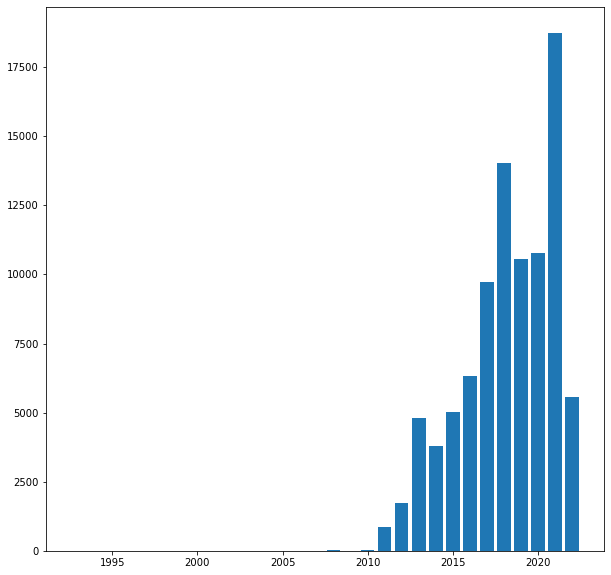

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(electric.loc[:, "Model Year"].value_counts().index, electric.loc[:, "Model Year"].value_counts())
# Model Year : 자동차 모델 연도 , 2011년도 모델을 기점으로 가파르게 증가 , 2011년 이전 모델은 거의 도로에 굴러다니는게 없음
# 그 전에는 많이 생산을 못한 건지, 안 한 건지, 했었는데 못 팔은건지, 해서 많이 팔았는데 오래되서 대부분 폐차를 시킨건지는 알수없지만.. (적어도 이 데이터만으로는)

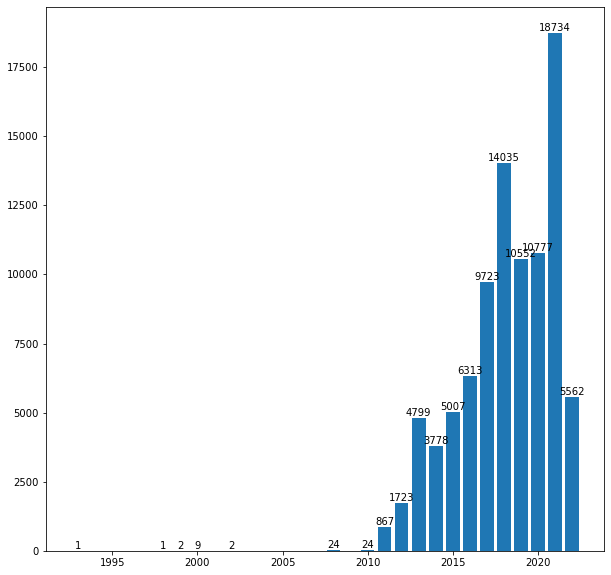

In [12]:
# 숫자도 같이 보고싶음

fig, ax = plt.subplots(figsize=(10,10))
bars = ax.bar(electric.loc[:, "Model Year"].value_counts().index, electric.loc[:, "Model Year"].value_counts())

ax.bar_label(bars)
plt.show()

In [13]:
# make 필드도 접목시켜보기 (제조사)

In [14]:
electric.Make.value_counts()

TESLA                   39791
NISSAN                  12436
CHEVROLET                9492
FORD                     5535
KIA                      4327
BMW                      3847
TOYOTA                   3817
AUDI                     1830
VOLKSWAGEN               1760
CHRYSLER                 1600
HYUNDAI                  1275
VOLVO                    1033
FIAT                      792
HONDA                     764
PORSCHE                   656
JEEP                      615
MITSUBISHI                541
MINI                      441
MERCEDES-BENZ             352
SMART                     275
POLESTAR                  222
JAGUAR                    201
CADILLAC                   95
LINCOLN                    83
SUBARU                     50
RIVIAN                     37
LAND ROVER                 36
FISKER                     13
AZURE DYNAMICS              7
WHEEGO ELECTRIC CARS        3
TH!NK                       2
LUCID MOTORS                2
BENTLEY                     2
DODGE     

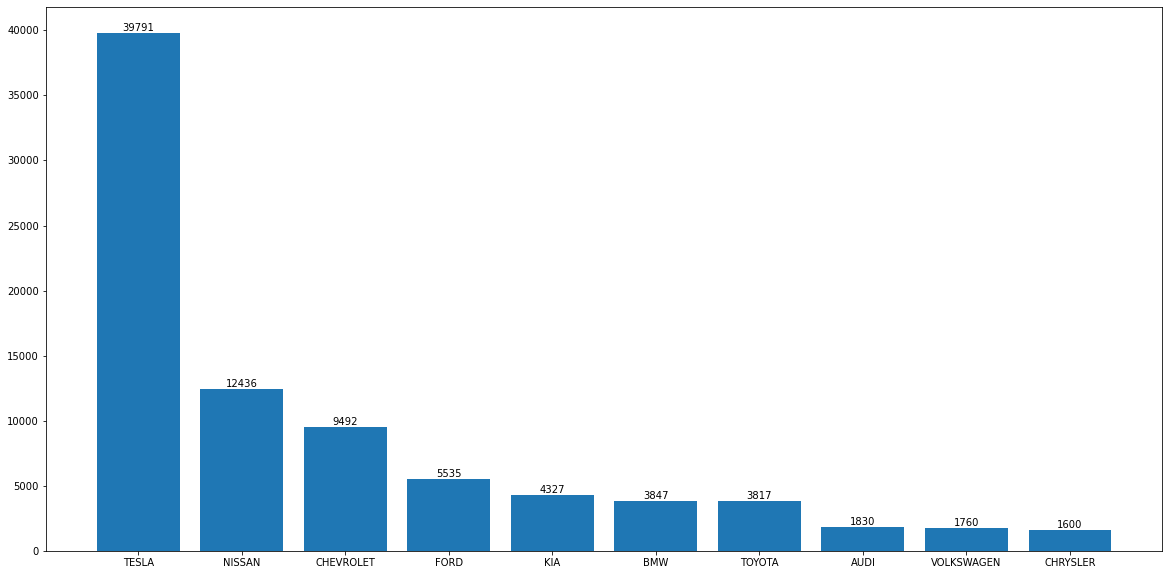

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
# bars = ax.bar(electric.Make.value_counts().index, electric.Make.value_counts())
bars = ax.bar(electric.Make.value_counts()[0:10].index, electric.Make.value_counts()[0:10])

ax.bar_label(bars)
plt.show()

# 테슬라가 상당히 많다는것에 주목하고 싶음, 2위까지는 직전하위순위에 끽해야 2배정도지만, 1위와 2위 차이는 3배

<AxesSubplot:xlabel='count', ylabel='Make'>

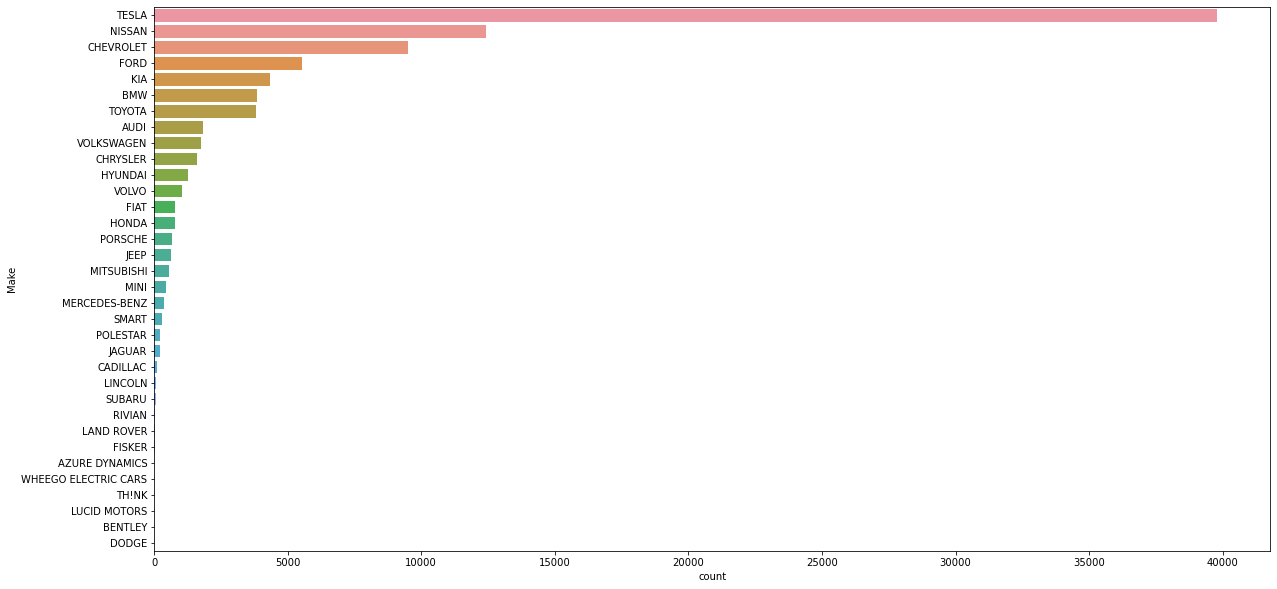

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y="Make", data=(electric), order=electric.Make.value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Make'>

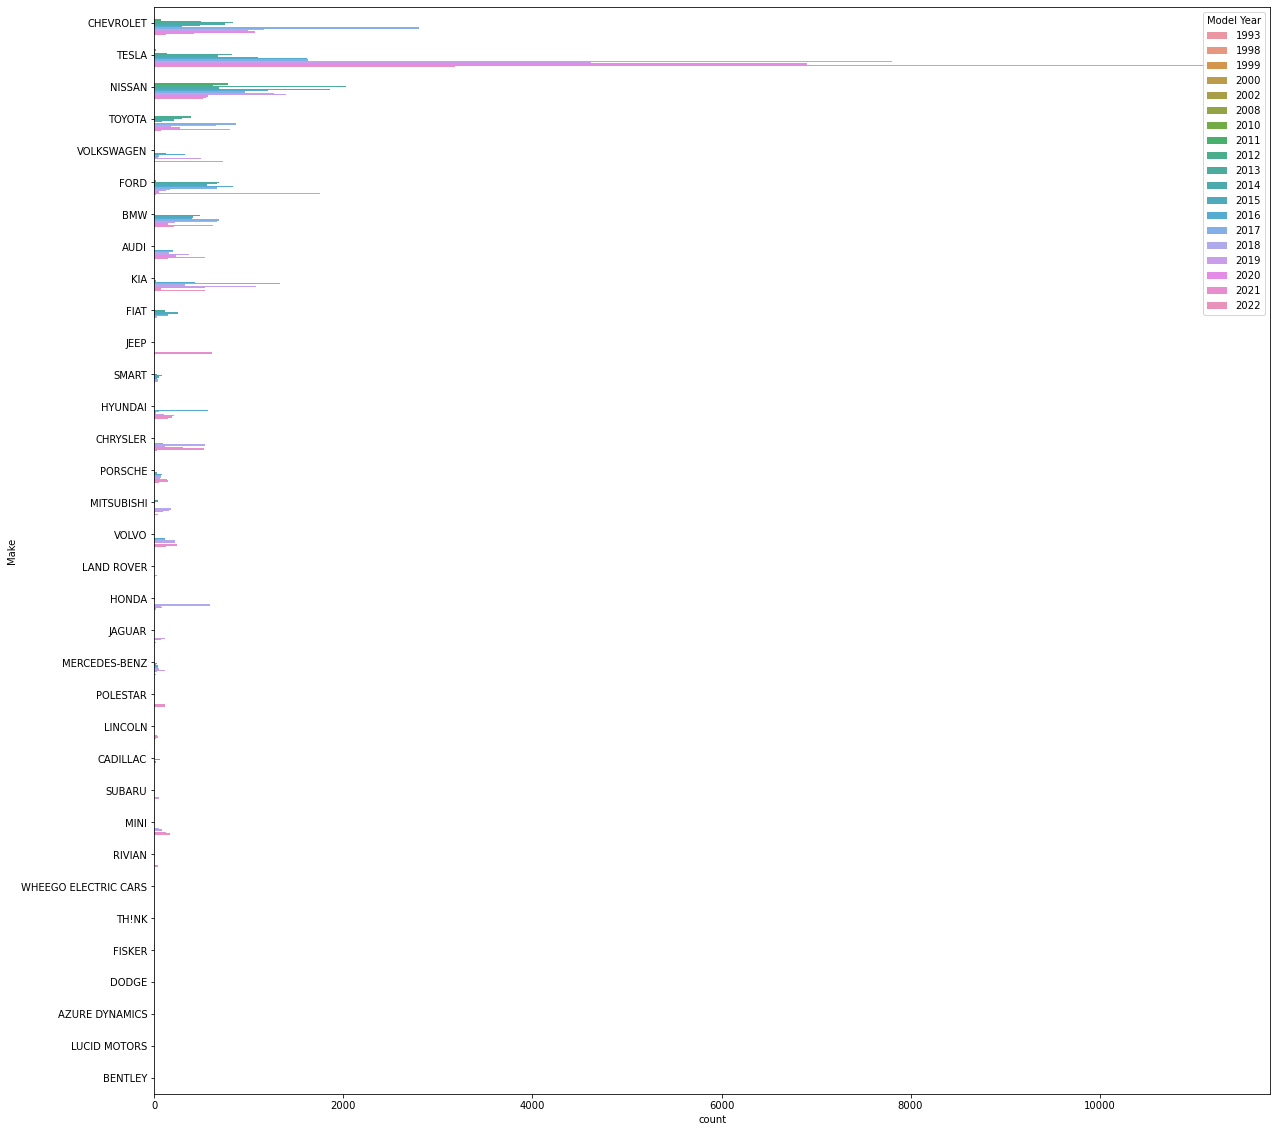

In [17]:
fig, ax = plt.subplots(figsize=(20,20))

sns.countplot(
    y = 'Make',
    data = electric,
    hue = 'Model Year',
)

In [18]:
top_n = electric.Make.value_counts().index[:5]
top_n

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'KIA'], dtype='object')

In [19]:
(
    electric.assign(Make=electric.Make.where(electric.Make.isin(top_n), 'Other'))
    .Make.value_counts()
)

TESLA        39791
Other        20352
NISSAN       12436
CHEVROLET     9492
FORD          5535
KIA           4327
Name: Make, dtype: int64

In [20]:
electric1 = electric.assign(Make1=electric.Make.where(electric.Make.isin(top_n), 'Other'))
electric1

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Make1
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC,CHEVROLET
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC,TESLA
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN,TESLA
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC,CHEVROLET
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC,NISSAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,5UXKT0C37H,Pierce,GIG HARBOR,WA,98332,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,26.0,131262967,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Other
91929,5YJ3E1EB6K,Snohomish,BOTHELL,WA,98012,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,477662762,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC,TESLA
91930,5YJ3E1EB2J,Snohomish,LAKE STEVENS,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,44.0,209736698,POINT (-122.085999 48.016305),PUGET SOUND ENERGY INC,TESLA
91931,5YJ3E1EA1K,King,FEDERAL WAY,WA,98023,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,30.0,478128010,POINT (-122.362029 47.308531),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA


In [21]:
# electric.Make.value_counts()

In [30]:
electric1.loc[:, 'Model Year'].value_counts().index.sort_values()
# electric1.loc[:, 'Model Year'].value_counts().index.sort_values().delete([0,1,2,3,4,5,6])

Int64Index([1993, 1998, 1999, 2000, 2002, 2008, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

In [22]:
year_sort = electric1.loc[:, 'Model Year'].value_counts().index.sort_values().delete([0,1,2,3,4,5,6])

electric2 = (
    electric1.assign(Model_Year1 = electric1.loc[:, 'Model Year']
                    .where(electric1.loc[:, 'Model Year'].isin(year_sort), 10))
)

electric2

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Make1,Model_Year1
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC,CHEVROLET,2015
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC,TESLA,2018
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN,TESLA,2019
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC,CHEVROLET,2017
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC,NISSAN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,5UXKT0C37H,Pierce,GIG HARBOR,WA,98332,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,26.0,131262967,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Other,2017
91929,5YJ3E1EB6K,Snohomish,BOTHELL,WA,98012,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,477662762,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC,TESLA,2019
91930,5YJ3E1EB2J,Snohomish,LAKE STEVENS,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,44.0,209736698,POINT (-122.085999 48.016305),PUGET SOUND ENERGY INC,TESLA,2018
91931,5YJ3E1EA1K,King,FEDERAL WAY,WA,98023,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,30.0,478128010,POINT (-122.362029 47.308531),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA,2019


In [23]:
# electric2.Make1.value_counts()
# electric2.Model_Year1.value_counts().index.astype(str).sort_values()

<AxesSubplot:xlabel='Make1', ylabel='count'>

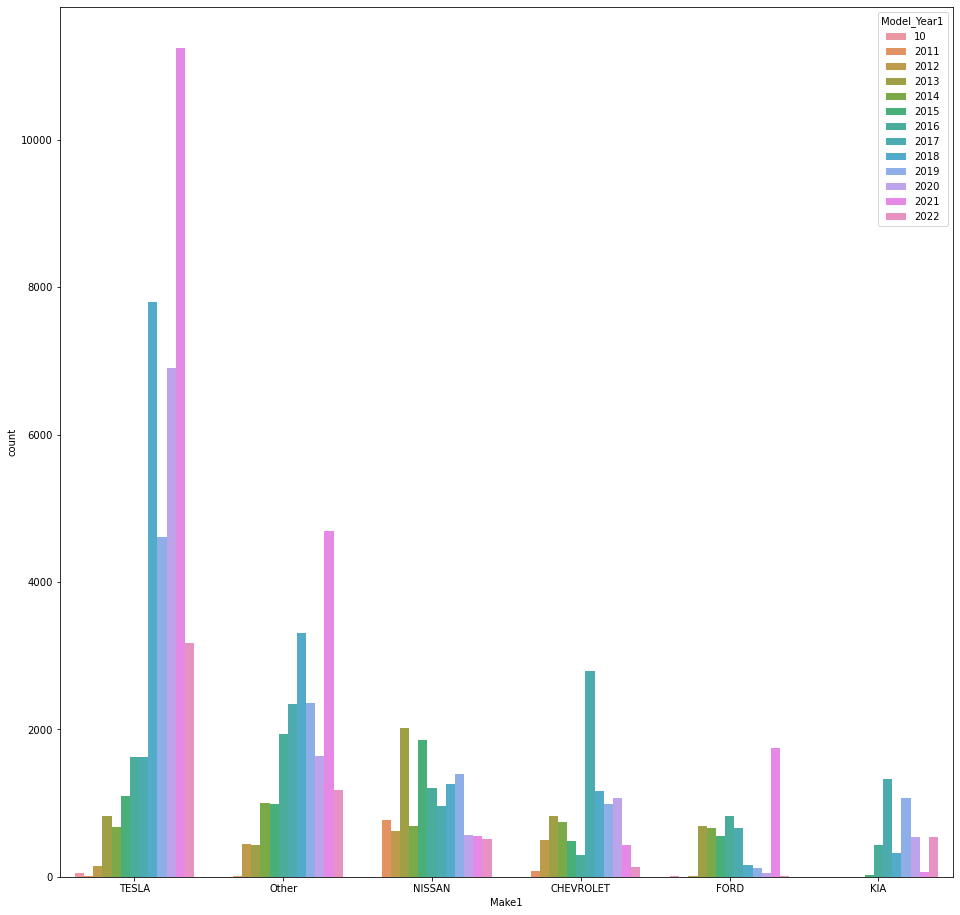

In [24]:
fig, ax = plt.subplots(figsize=(16,16))

sns.countplot(
    x = 'Make1',
    data = electric2,
    # hue = 'Model Year',
    hue = electric2.Model_Year1,
    hue_order = electric2.Model_Year1.value_counts().index.sort_values(),
    order = electric2.Make1.value_counts().index
)

In [25]:
# 왜인지 hue_order는 인덱스를 str로 하면 이상해져서 11년도 이전을 일단 10으로표기

# 테슬라가 최근에 4~5년사이에 엄청 치고 올라온 브랜드인 것을 알수 있음
# 18년 이후 모델 수량은 1위에서 떨어진적이 없음, 비교대상인 2위는 하위 29개의 브랜드 통합인 것도 괄목할만함 (테슬라 vs 하위 29개 제조사 임)
# 니산은 11년, 12년 ~~ 모델 이 많다가(당시에는 1위였는데) 최신모델로 갈수록 밀려나는중

In [26]:
electric2.Model_Year1.value_counts()

2021    18734
2018    14035
2020    10777
2019    10552
2017     9723
2016     6313
2022     5562
2015     5007
2013     4799
2014     3778
2012     1723
2011      867
10         63
Name: Model_Year1, dtype: int64

In [27]:
electric.Make.describe()

count     91933
unique       34
top       TESLA
freq      39791
Name: Make, dtype: object